In [85]:
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
import decomp_alllevels as deco
from imp import reload
import write_netCDF as write
import amoc_plots as aplot
import tools
import xz_tools as xz_tools
import numpy.ma as ma
from scipy.interpolate import interp1d
import matplotlib.colors as mplc
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap

In [86]:
os.chdir("/work/mh0256/m300522/data_storm/eddies/maps")

In [273]:
EKE_full = tools.netread_data('EKE_full_box.nc','EKE_full')
lat,lon,depth = tools.netread_grid('EKE_full_box.nc','lat','lon','depth_15')
vel_hor_mag = tools.netread_data('vel_hor_mag_box.nc','vke')

In [88]:
np.max(lon)

-18.671119706030602

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in log10
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


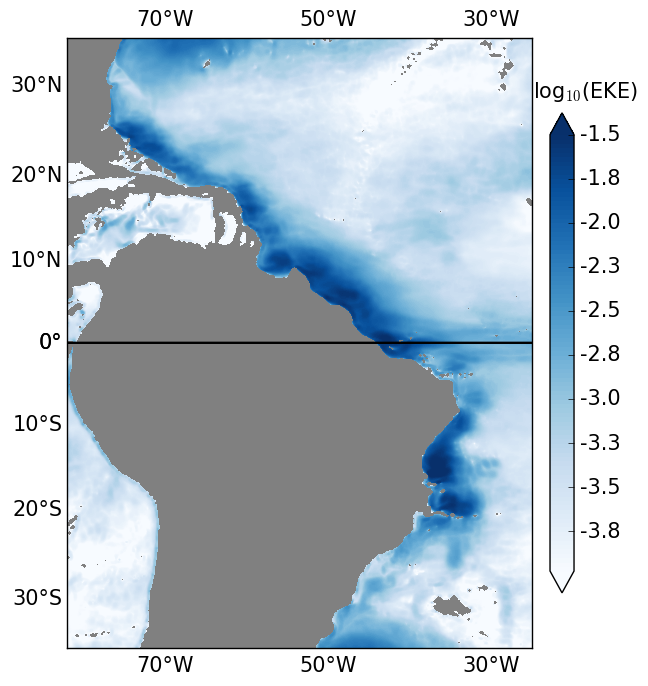

In [306]:
fig = plt.figure(figsize=(6,8))
a=fig.add_subplot(111,axisbg='grey')
m = Basemap(llcrnrlon=-82,
            llcrnrlat=-35,
            urcrnrlon=-25,
            urcrnrlat=35,
            projection='merc',
            )
#m.drawcoastlines()

#m.fillcontinents(color='grey')
parallels = (0.,0.)
m.drawparallels(parallels,labels=[1,0,0,1],linewidth=1.5,dashes=[400,1],fontsize=15)
m.drawparallels((-30,-20,-10,10,20,30),labels=[1,0,0,0], linewidth=0.0,fontsize=15)
m.drawmeridians((-70,-50,-30),labels=[0,0,1,1], linewidth=0.0,fontsize=15)
x, y =m(lon, lat)
v = np.linspace(-4,-1.5,100)
fplot=m.contourf(x,y,np.log10(EKE_full[55,:,:]),v,cmap="Blues",extend="both")
cb_coord = [0.93,0.2,0.04,0.6]
cbar_ax = fig.add_axes(cb_coord)
cb=plt.colorbar(orientation="vertical",cax=cbar_ax,format='%.1f')
cb.set_label('log$_{10}$(EKE)', labelpad=-25, y=1.07, rotation=0,fontsize=15)
cb.ax.tick_params(labelsize=15)
plt.savefig("/work/mh0256/m300522/data_storm/eddies/2000s/figs/map_2000m_EKE.png",bbox_inches = 'tight')

plt.show()

/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10
/sw/rhel6-x64/python/python-3.5.2-gcc49/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


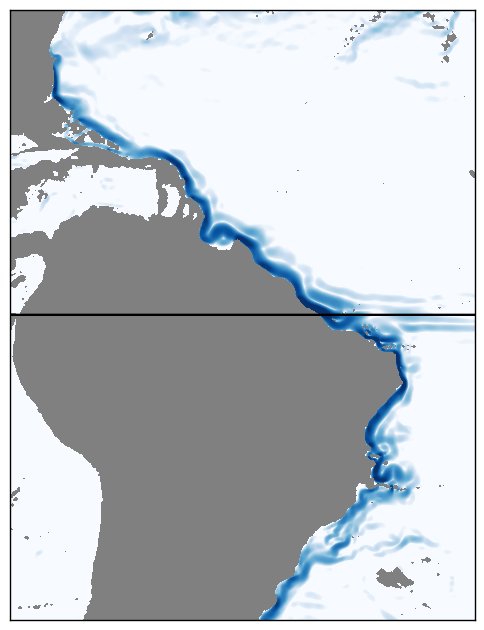

In [310]:
fig = plt.figure(figsize=(6,8))
a=fig.add_subplot(111,axisbg='grey')
m = Basemap(llcrnrlon=-82,
            llcrnrlat=-35,
            urcrnrlon=-25,
            urcrnrlat=35,
            projection='merc',
            )
#m.drawcoastlines()

#m.fillcontinents(color='grey')
parallels = (0.,0.)
m.drawparallels(parallels,labels=[0,0,0,1],linewidth=1.5,dashes=[400,1],fontsize=15)
#m.drawparallels((-30,-20,-10,10,20,30),labels=[1,0,0,0], linewidth=0.0,fontsize=15)
#m.drawmeridians((-70,-50,-30),labels=[0,0,1,1], linewidth=0.0,fontsize=15)
x, y =m(lon, lat)
v = np.linspace(-4,-1.5,100)
fplot=m.contourf(x,y,np.log10(0.5*vel_hor_mag[55,:,:]),v,cmap="Blues",extend="both")
#cb_coord = [0.93,0.2,0.04,0.6]
#cbar_ax = fig.add_axes(cb_coord)
#cb=plt.colorbar(orientation="vertical",cax=cbar_ax,format='%.1f')
#cb.ax.tick_params(labelsize=15)
#cb.set_label('log$_{10}$(MKE)', labelpad=-25, y=1.07, rotation=0,fontsize=15)
plt.savefig("/work/mh0256/m300522/data_storm/eddies/2000s/figs/map_2000m_MKE_blank.png",bbox_inches = 'tight')
plt.show()